# 1일차: 주식시장 구조와 금융 데이터 이해 - 실습

## 학습 목표
- yfinance를 사용하여 주식 데이터 가져오기
- OHLCV 데이터 이해하기
- 기본 지표(이동평균, 수익률) 계산하기
- pandas DataFrame으로 데이터 정리하기

## 1. 필요한 라이브러리 설치 및 불러오기

In [2]:
# !pip install yfinance pandas numpy matplotlib

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# 한글 폰트 설정 (Google Colab 환경)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 경고 메시지 숨기기
import warnings
warnings.filterwarnings('ignore')

print("라이브러리 불러오기 완료!")

라이브러리 불러오기 완료!


## 2. 주식 데이터 가져오기

### yfinance란?
- Yahoo Finance에서 제공하는 무료 주식 데이터를 파이썬으로 가져오는 도구
- 한국 주식은 종목코드 뒤에 `.KS` (코스피) 또는 `.KQ` (코스닥)를 붙임

In [4]:
# 삼성전자 데이터 가져오기 (최근 2년)
ticker = "005930.KS"  # 삼성전자 코스피 코드
start_date = "2023-01-01"
end_date = "2025-01-01"

# 데이터 다운로드
samsung = yf.download(ticker, start=start_date, end=end_date, multi_level_index=False)

# 데이터 확인
print(f"데이터 shape: {samsung.shape}")
print(f"데이터 기간: {samsung.index[0]} ~ {samsung.index[-1]}")
print("\n처음 5개 데이터:")
samsung.head()

[*********************100%***********************]  1 of 1 completed

데이터 shape: (489, 5)
데이터 기간: 2023-01-02 00:00:00 ~ 2024-12-30 00:00:00

처음 5개 데이터:


,Close,High,Low,Open,Volume
Date,,,,,
2023-01-02,52343.421875,52909.296706,52060.484459,52343.421875,10031448
2023-01-03,52249.101562,52814.976309,51400.289443,52249.101562,13547030
2023-01-04,54512.605469,54701.230401,52437.731212,52532.043678,20188071
2023-01-05,54889.851562,55455.726321,54323.976804,54889.851562,15682826
2023-01-06,55644.355469,56021.605336,54606.918333,54984.168200,17334989


## 3. OHLCV 데이터 이해하기

- **Open (시가)**: 장이 시작할 때 첫 거래 가격
- **High (고가)**: 그날 가장 높았던 가격
- **Low (저가)**: 그날 가장 낮았던 가격
- **Close (종가)**: 장이 끝날 때 마지막 거래 가격
- **Volume (거래량)**: 그날 거래된 주식 수
- **Adj Close (수정종가)**: 배당금, 주식분할 등을 반영한 종가

In [5]:
sample_date = samsung.index[100]
sample_data = samsung.iloc[100]

In [6]:
samsung.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 489 entries, 2023-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   489 non-null    float64
 1   High    489 non-null    float64
 2   Low     489 non-null    float64
 3   Open    489 non-null    float64
 4   Volume  489 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 22.9 KB


날짜: 2023-05-30
------------------------------
시가 (Open):     67,634원
고가 (High):     68,583원
저가 (Low):      67,539원
종가 (Close):    68,583원
거래량 (Volume): 27,476,897주


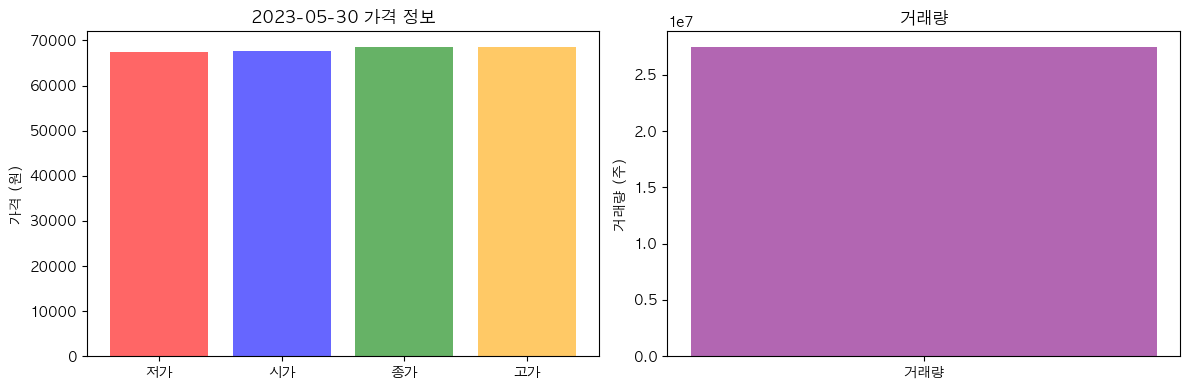

In [7]:
# 특정 날짜의 데이터 자세히 보기
sample_date = samsung.index[100]
sample_data = samsung.iloc[100]

print(f"날짜: {sample_date.strftime('%Y-%m-%d')}")
print("-" * 30)
print(f"시가 (Open):     {sample_data['Open']:,.0f}원")
print(f"고가 (High):     {sample_data['High']:,.0f}원")
print(f"저가 (Low):      {sample_data['Low']:,.0f}원")
print(f"종가 (Close):    {sample_data['Close']:,.0f}원")
print(f"거래량 (Volume): {sample_data['Volume']:,.0f}주")

# 하루 변동 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 가격 범위
prices = [sample_data['Low'], sample_data['Open'], sample_data['Close'], sample_data['High']]
labels = ['저가', '시가', '종가', '고가']
colors = ['red', 'blue', 'green', 'orange']

ax1.bar(labels, prices, color=colors, alpha=0.6)
ax1.set_title(f"{sample_date.strftime('%Y-%m-%d')} 가격 정보")
ax1.set_ylabel('가격 (원)')

# 거래량
ax2.bar(['거래량'], [sample_data['Volume']], color='purple', alpha=0.6)
ax2.set_title('거래량')
ax2.set_ylabel('거래량 (주)')

plt.tight_layout()
plt.show()

## 4. 여러 종목 데이터 가져오기

In [8]:
# 주요 종목들
tickers = {
    "005930.KS": "삼성전자",
    "000660.KS": "SK하이닉스", 
    "035420.KS": "NAVER",
    "035720.KS": "카카오",
    "005490.KS": "POSCO홀딩스"
}

# 모든 종목 데이터 가져오기
stock_data = {}

for ticker, name in tickers.items():
    try:
        data = yf.download(ticker, start=start_date, end=end_date, progress=False, multi_level_index=False)
        stock_data[name] = data
        print(f"✓ {name} 데이터 수집 완료 ({len(data)}개 거래일)")
    except Exception as e:
        print(f"✗ {name} 데이터 수집 실패: {e}")

print(f"\n총 {len(stock_data)}개 종목 데이터 수집 완료")

✓ 삼성전자 데이터 수집 완료 (489개 거래일)
✓ SK하이닉스 데이터 수집 완료 (489개 거래일)
✓ NAVER 데이터 수집 완료 (489개 거래일)
✓ 카카오 데이터 수집 완료 (489개 거래일)
✓ POSCO홀딩스 데이터 수집 완료 (489개 거래일)

총 5개 종목 데이터 수집 완료


## 5. 기본 지표 계산하기 - 이동평균선

### 5.1 이동평균선(Moving Average, MA)이란?
- Simple Moving Average, SMA
- 최근 N일간의 평균 가격
- 주가의 추세를 파악하는 데 사용
- 20일 이동평균: 단기 추세
- 60일 이동평균: 중기 추세

- rolling()
  - 이동창을 정의하여 Rolling 객체를 만듬
  - 뒤에, 무엇을 계산할지 집계함수를 사용해야 함

In [9]:
# 삼성전자 이동평균 계산
samsung_copy = samsung.copy()

# 20일 이동평균
samsung_copy['MA20'] = samsung_copy['Close'].rolling(window=20).mean()

# 60일 이동평균  
samsung_copy['MA60'] = samsung_copy['Close'].rolling(window=60).mean()

# 결과 확인 (최근 5일)
print("종가와 이동평균선 (최근 5일):")
print(samsung_copy[['Close', 'MA20', 'MA60']].tail())

종가와 이동평균선 (최근 5일):
                   Close          MA20          MA60
Date                                                
2024-12-23  52268.597656  53250.468945  55547.014714
2024-12-24  53147.886719  53059.957227  55385.177474
2024-12-26  52366.300781  52928.064453  55212.577148
2024-12-27  52821.726562  52858.022266  55091.531510
2024-12-30  52329.902344  52826.893164  54965.545378


### 5.2 이동평균선 시각화

- 골든크로스 (Golden Cross)
  - 단기 MA가 장기 MA를 아래에서 위로 돌파(상향 교차)하는 것
  - 보통 “상승 전환/상승 추세 강화” 신호로 해석

- 데드크로스 (Death Cross)
  - 단기 MA가 장기 MA를 위에서 아래로 이탈(하향 교차)하는 것
  - 보통 “하락 전환/하락 추세 강화” 신호로 해석

- 단기가 변동이 많아 기준이 된다

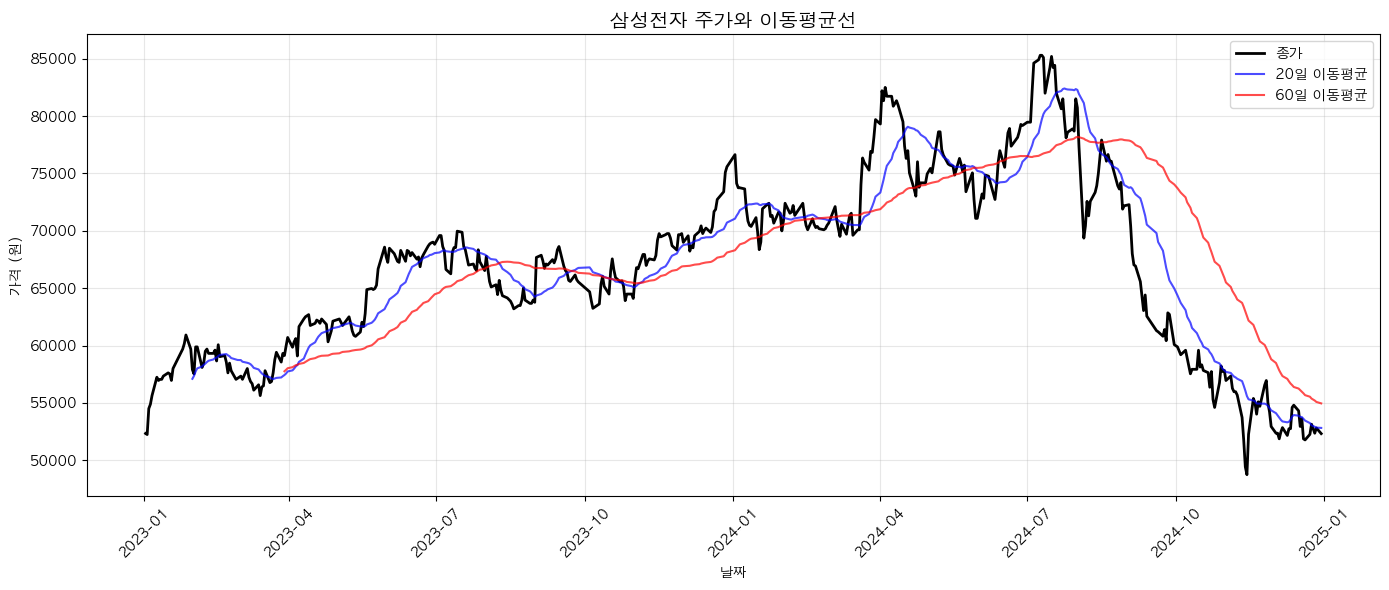

골든크로스 발생: 6번
데드크로스 발생: 6번


In [10]:
# 최근 6개월 데이터만 시각화
# recent_data = samsung_copy.iloc[-180:]  # 약 6개월
recent_data = samsung_copy 

plt.figure(figsize=(14, 6))
plt.plot(recent_data.index, recent_data['Close'], label='종가', color='black', linewidth=2)
plt.plot(recent_data.index, recent_data['MA20'], label='20일 이동평균', color='blue', alpha=0.7)
plt.plot(recent_data.index, recent_data['MA60'], label='60일 이동평균', color='red', alpha=0.7)

plt.title('삼성전자 주가와 이동평균선', fontsize=14)
plt.xlabel('날짜')
plt.ylabel('가격 (원)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 골든크로스/데드크로스 찾기
samsung_copy['Signal'] = 0
samsung_copy.loc[samsung_copy['MA20'] > samsung_copy['MA60'], 'Signal'] = 1  # 골든크로스
samsung_copy.loc[samsung_copy['MA20'] < samsung_copy['MA60'], 'Signal'] = -1  # 데드크로스

# 시그널 변화 지점 찾기
signal_changes = samsung_copy['Signal'].diff()
golden_cross = samsung_copy[signal_changes == 2].index # (MA20 < MA60) == -1  =>  (MA20 > MA60) == 1 [1 - (-1) = 2]
dead_cross = samsung_copy[signal_changes == -2].index # (MA20 > MA60) == 1  =>  (MA20 < MA60) == -1 [(-1) - 1 = -2]

print(f"골든크로스 발생: {len(golden_cross)}번")
print(f"데드크로스 발생: {len(dead_cross)}번")

In [11]:
samsung_copy['Signal'].value_counts()

Signal
 1    242
-1    188
 0     59
Name: count, dtype: int64

In [12]:
golden_cross

DatetimeIndex(['2023-04-07', '2023-09-25', '2023-10-18', '2023-11-06',
               '2024-03-26', '2024-07-02'],
              dtype='datetime64[ns]', name='Date', freq=None)

## 6. 지수이동평균(Exponential Moving Average)

- 구간 변동 가중치 평균
  - 가중치가 과거로 갈수록 지수적으로(Exponential) 줄어든다고 해서 지수이동평균
  - 급등/급락에 빠르게 반응

- EMA
  - $EMA_t = \alpha x_t + \alpha(1 - \alpha) x_{t-1} + \alpha(1 - \alpha)^2 x_{t-2} + \cdots$
  - $EMA_{t-1} = \alpha x_{t-1} + \alpha(1 - \alpha) x_{t-2} + \alpha(1 - \alpha)^2 x_{t-3} + \cdots$
  - $(1 - \alpha)EMA_{t-1} = \alpha(1 - \alpha) x_{t-1} + \alpha(1 - \alpha)^2 x_{t-2} + \alpha(1 - \alpha)^3 x_{t-3} + \cdots$

- 가중치 합만 분리
  - $\alpha + \alpha(1 - \alpha) + \alpha(1 - \alpha)^2 + \cdots$

- $\alpha[공비가\ (1 - \alpha) 인\ 무한등비수열]$
  - $\alpha[1 + (1 - \alpha) + (1 - \alpha)^2 + \cdots]$
  - 무한 가중합을 재귀식으로 정리

- $\displaystyle [1 + (1 - \alpha) + (1 - \alpha)^2 + \cdots] = \frac{1}{1 - (1 - \alpha)} = \frac{1}{\alpha}$
  - 전체 가중치 합은 $\displaystyle \alpha \cdot \frac{1}{\alpha} = 1$

- $\displaystyle \alpha = \frac{2}{N + 1}$
  - N = 기간

- EMA 재귀식
  - $EMA_t = \alpha x_t + (1 - \alpha) EMA_{t-1}$
  - 맨 처음 EMA 는 처음 N 개로 SMA를 먼저 구하고, 그것을 EMA 의 시작값으로 한다

- pandas ewm
  - exponentially weighted mea의 줄임말로,
*pandas가 “지수가중(=지수이동) 계산을 하기 위한 준비 객체”*를 만들어 주는 pandas 내장 메서드

- Series.ewm(...) / DataFrame.ewm(...)
  - 지수가중 계산용 EWM 객체를 반환

- 여기에 .mean(), .std(), .var() 같은 메서드를 붙이면
  - 지수가중 평균 / 분산 / 표준편차 등을 계산

- adjust=False 로 해야 재귀식 계산

In [13]:
# 삼성전자 지수이동평균(EMA) 계산
samsung_copy = samsung.copy()

# 20일 지수이동평균 (EMA20)
samsung_copy["EMA20"] = samsung_copy["Close"].ewm(span=20, adjust=False).mean()

# 60일 지수이동평균 (EMA60)
samsung_copy["EMA60"] = samsung_copy["Close"].ewm(span=60, adjust=False).mean()

# 결과 확인 (최근 5일)
print("종가와 지수이동평균선 (최근 5일):")
print(samsung_copy[["Close", "EMA20", "EMA60"]].tail())

종가와 지수이동평균선 (최근 5일):
                   Close         EMA20         EMA60
Date                                                
2024-12-23  52268.597656  53287.920372  56699.777554
2024-12-24  53147.886719  53274.583833  56583.322117
2024-12-26  52366.300781  53188.080686  56445.059123
2024-12-27  52821.726562  53153.189817  56326.261334
2024-12-30  52329.902344  53074.781486  56195.233170


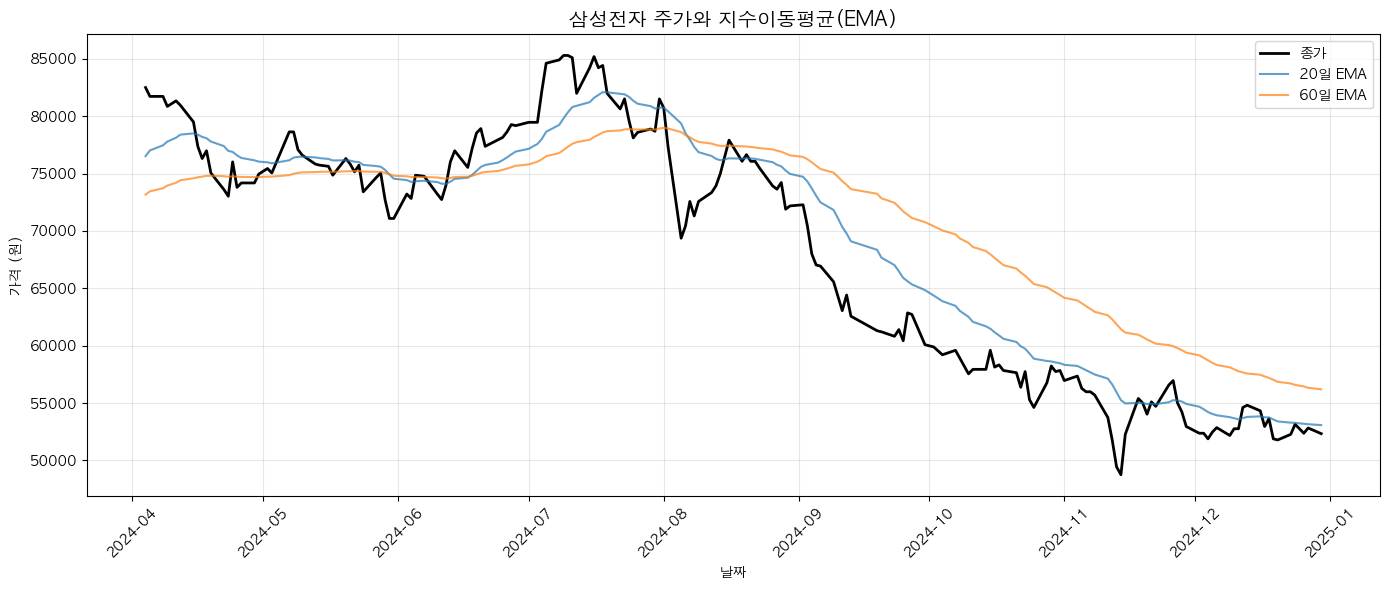

In [14]:
# 최근 6개월 데이터만 시각화 (EMA)
recent_data = samsung_copy.iloc[-180:]  # 약 6개월

plt.figure(figsize=(14, 6))
plt.plot(recent_data.index, recent_data["Close"], label="종가", color="black", linewidth=2)
plt.plot(recent_data.index, recent_data["EMA20"], label="20일 EMA", alpha=0.7)
plt.plot(recent_data.index, recent_data["EMA60"], label="60일 EMA", alpha=0.7)

plt.title("삼성전자 주가와 지수이동평균(EMA)", fontsize=14)
plt.xlabel("날짜")
plt.ylabel("가격 (원)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# EMA 기준 골든크로스 / 데드크로스
samsung_copy["EMASignal"] = 0
samsung_copy.loc[samsung_copy["EMA20"] > samsung_copy["EMA60"], "EMASignal"] = 1   # EMA 골든크로스 구간
samsung_copy.loc[samsung_copy["EMA20"] < samsung_copy["EMA60"], "EMASignal"] = -1  # EMA 데드크로스 구간

# 시그널 변화 지점 찾기
ema_signal_changes = samsung_copy["EMASignal"].diff()
ema_golden_cross = samsung_copy[ema_signal_changes == 2].index   # -1 -> 1 (EMA20이 EMA60 위로 돌파)
ema_dead_cross   = samsung_copy[ema_signal_changes == -2].index  #  1 -> -1 (EMA20이 EMA60 아래로 하락)

print(f"EMA 골든크로스 발생: {len(ema_golden_cross)}번")
print(f"EMA 데드크로스 발생: {len(ema_dead_cross)}번")

EMA 골든크로스 발생: 4번
EMA 데드크로스 발생: 4번


## 7. 수익률 계산하기

### 수익률의 종류
- **일간 수익률**: 전일 대비 변화율
- **누적 수익률**: 특정 시점부터 현재까지의 총 수익률
- **기간 수익률**: 특정 기간(예: 6개월) 동안의 수익률

In [16]:
# 일간 수익률 계산
samsung_copy['Daily_Return'] = samsung_copy['Close'].pct_change() * 100  # 백분율로 표시

# 20일(약 1개월) 수익률
samsung_copy['Return_20d'] = samsung_copy['Close'].pct_change(periods=20) * 100

# 60일(약 3개월) 수익률
samsung_copy['Return_60d'] = samsung_copy['Close'].pct_change(periods=60) * 100

# 120일(약 6개월) 수익률
samsung_copy['Return_120d'] = samsung_copy['Close'].pct_change(periods=120) * 100

# 결과 확인
print("다양한 기간의 수익률 (최근 5일):")
print(samsung_copy[['Close', 'Daily_Return', 'Return_20d', 'Return_60d', 'Return_120d']].tail())
print("\n" + "="*60)
print(f"최근 거래일 기준:")
print(f"일간 수익률: {samsung_copy['Daily_Return'].iloc[-1]:.2f}%")
print(f"20일 수익률: {samsung_copy['Return_20d'].iloc[-1]:.2f}%")
print(f"60일 수익률: {samsung_copy['Return_60d'].iloc[-1]:.2f}%")
print(f"120일 수익률: {samsung_copy['Return_120d'].iloc[-1]:.2f}%")

다양한 기간의 수익률 (최근 5일):
                   Close  Daily_Return  Return_20d  Return_60d  Return_120d
Date                                                                       
2024-12-23  52268.597656      0.943390   -7.599317  -13.504535   -34.068403
2024-12-24  53147.886719      1.682251   -6.689537  -15.447860   -32.877013
2024-12-26  52366.300781     -1.470587   -4.795738  -16.510900   -34.106668
2024-12-27  52821.726562      0.869692   -2.583507  -12.087548   -33.533599
2024-12-30  52329.902344     -0.931102   -1.175737  -12.621949   -34.152469

최근 거래일 기준:
일간 수익률: -0.93%
20일 수익률: -1.18%
60일 수익률: -12.62%
120일 수익률: -34.15%


## 8. 수익률 분포 시각화

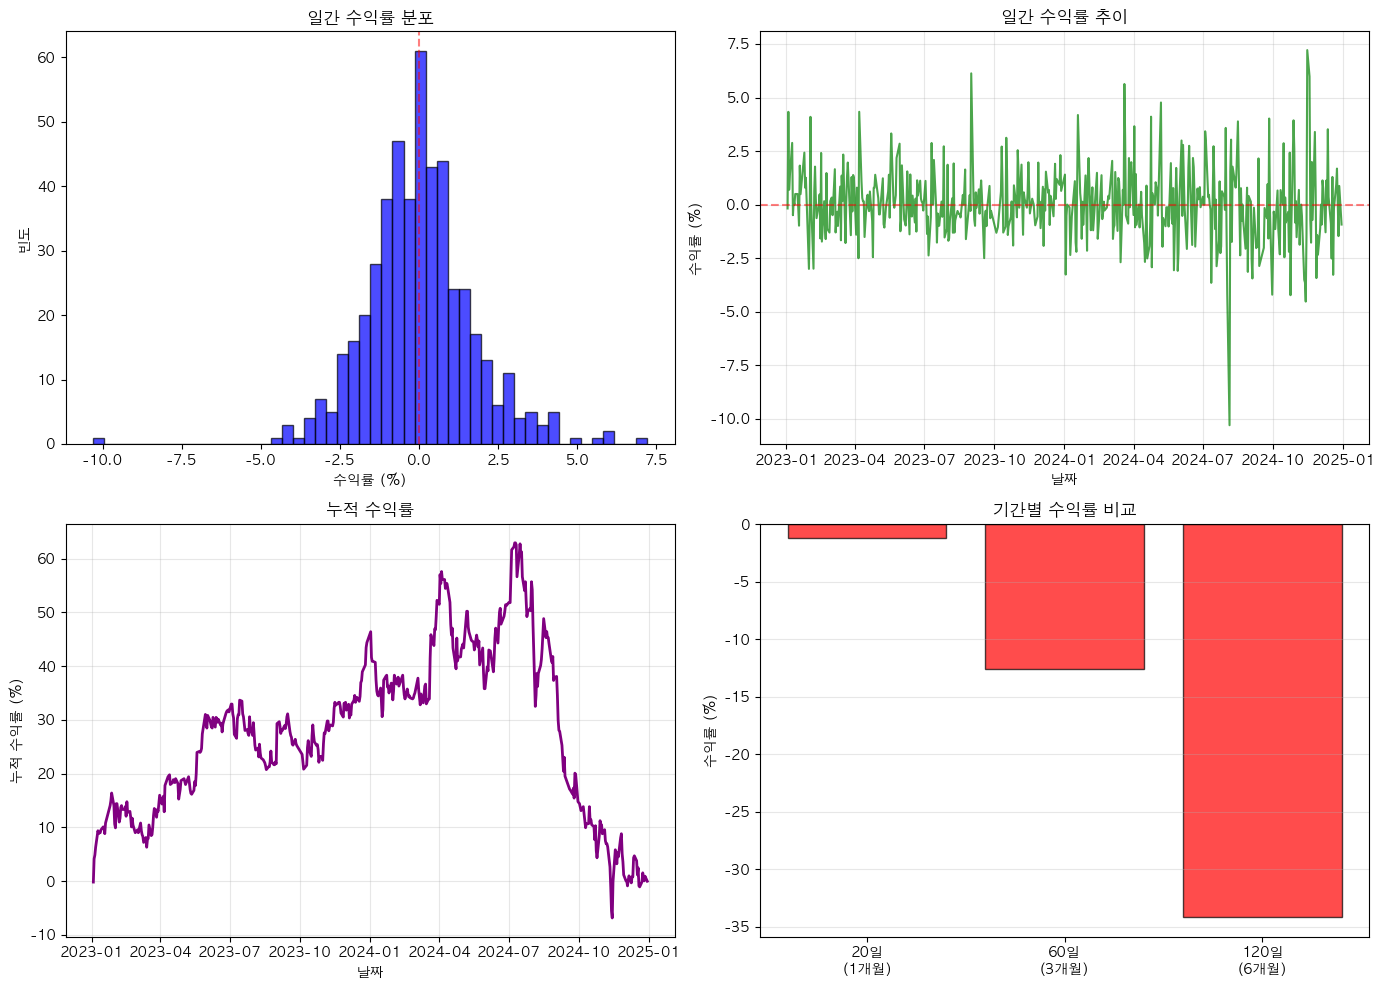

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 일간 수익률 히스토그램
axes[0, 0].hist(samsung_copy['Daily_Return'].dropna(), bins=50, color='blue', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('일간 수익률 분포')
axes[0, 0].set_xlabel('수익률 (%)')
axes[0, 0].set_ylabel('빈도')
axes[0, 0].axvline(x=0, color='red', linestyle='--', alpha=0.5)

# 일간 수익률 시계열
axes[0, 1].plot(samsung_copy.index, samsung_copy['Daily_Return'], color='green', alpha=0.7)
axes[0, 1].set_title('일간 수익률 추이')
axes[0, 1].set_xlabel('날짜')
axes[0, 1].set_ylabel('수익률 (%)')
axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[0, 1].grid(True, alpha=0.3)

# 누적 수익률
samsung_copy['Cumulative_Return'] = (1 + samsung_copy['Daily_Return']/100).cumprod() - 1
axes[1, 0].plot(samsung_copy.index, samsung_copy['Cumulative_Return'] * 100, color='purple', linewidth=2)
axes[1, 0].set_title('누적 수익률')
axes[1, 0].set_xlabel('날짜')
axes[1, 0].set_ylabel('누적 수익률 (%)')
axes[1, 0].grid(True, alpha=0.3)

# 기간별 수익률 비교
recent = samsung_copy.iloc[-1]
returns = [recent['Return_20d'], recent['Return_60d'], recent['Return_120d']]
periods = ['20일\n(1개월)', '60일\n(3개월)', '120일\n(6개월)']
colors = ['green' if r > 0 else 'red' for r in returns]

axes[1, 1].bar(periods, returns, color=colors, alpha=0.7, edgecolor='black')
axes[1, 1].set_title('기간별 수익률 비교')
axes[1, 1].set_ylabel('수익률 (%)')
axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 9. 모든 종목 수익률 비교

6개월 수익률 순위:
1.0위: NAVER        +24.47%
2.0위: 카카오          -5.21%
3.0위: SK하이닉스       -24.27%
4.0위: POSCO홀딩스     -31.96%
5.0위: 삼성전자         -36.33%


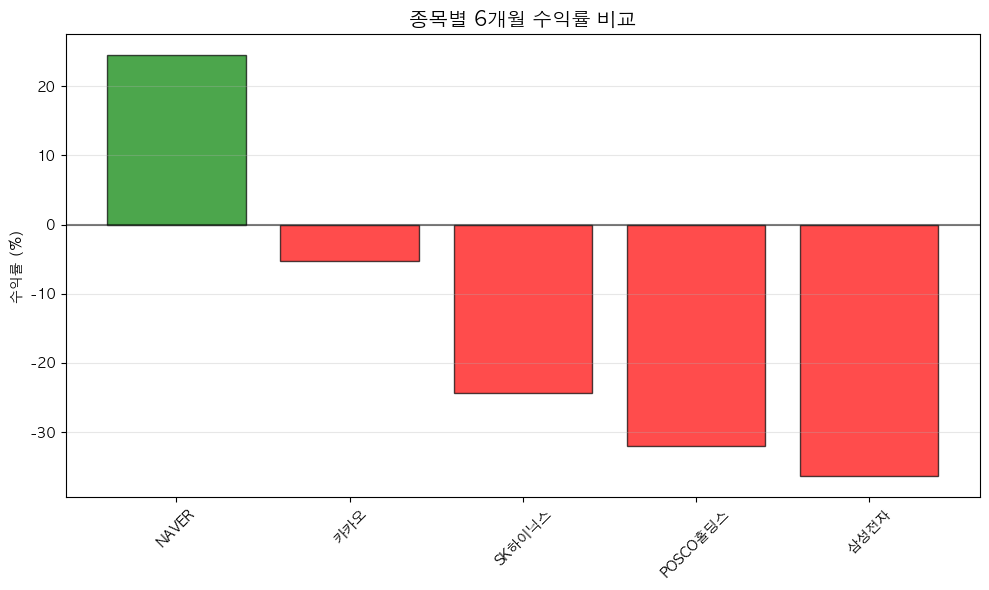

In [18]:
# 각 종목의 6개월 수익률 계산
returns_6m = {}

for name, data in stock_data.items():
    # 6개월 전 날짜 찾기 (약 120 거래일)
    if len(data) > 120:
        initial_price = data['Close'].iloc[-120]
        final_price = data['Close'].iloc[-1]
        returns_6m[name] = ((final_price - initial_price) / initial_price) * 100

# 수익률 순위 매기기
returns_df = pd.DataFrame.from_dict(returns_6m, orient='index', columns=['6개월_수익률'])
returns_df = returns_df.sort_values('6개월_수익률', ascending=False)
returns_df['순위'] = range(1, len(returns_df) + 1)

print("6개월 수익률 순위:")
print("=" * 40)
for idx, row in returns_df.iterrows():
    print(f"{row['순위']}위: {idx:12s} {row['6개월_수익률']:+.2f}%")

# 막대 그래프
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in returns_df['6개월_수익률']]
plt.bar(returns_df.index, returns_df['6개월_수익률'], color=colors, alpha=0.7, edgecolor='black')
plt.title('종목별 6개월 수익률 비교', fontsize=14)
plt.ylabel('수익률 (%)')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 10. 데이터를 하나의 DataFrame으로 정리하기

In [19]:
# 모든 종목의 종가만 모으기
close_prices = pd.DataFrame()

for name, data in stock_data.items():
    close_prices[name] = data['Close']

# 결측치 확인
print("결측치 개수:")
print(close_prices.isnull().sum())
print("\n데이터 shape:", close_prices.shape)
print("\n최근 5일 종가:")
print(close_prices.tail())

결측치 개수:
삼성전자        0
SK하이닉스      0
NAVER       0
카카오         0
POSCO홀딩스    0
dtype: int64

데이터 shape: (489, 5)

최근 5일 종가:
                    삼성전자         SK하이닉스          NAVER           카카오  \
Date                                                                   
2024-12-23  52268.597656  167843.953125  200018.875000  39640.140625   
2024-12-24  53147.886719  166755.312500  201511.562500  39440.445312   
2024-12-26  52366.300781  168338.750000  198924.250000  38491.875000   
2024-12-27  52821.726562  172693.187500  196734.984375  38791.421875   
2024-12-30  52329.902344  172099.421875  197929.125000  38142.402344   

                 POSCO홀딩스  
Date                       
2024-12-23  252783.015625  
2024-12-24  251818.203125  
2024-12-26  246994.093750  
2024-12-27  244582.031250  
2024-12-30  244582.031250  


## 11. 상관관계 분석

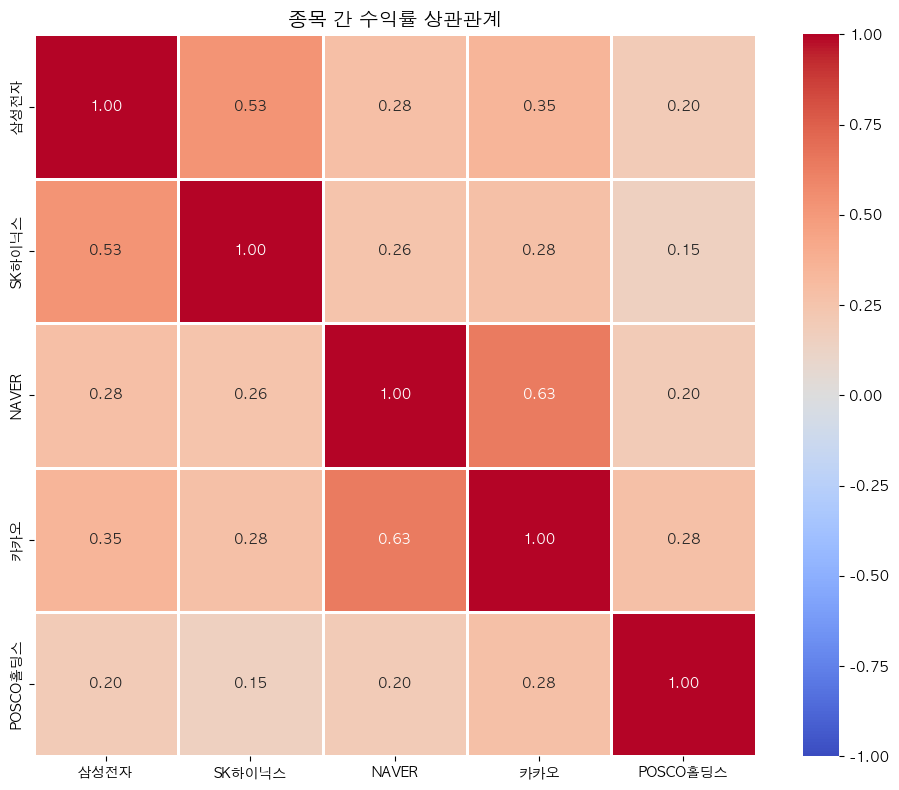


상관관계 해석:
1에 가까울수록: 함께 움직임 (양의 상관관계)
0에 가까울수록: 독립적으로 움직임
-1에 가까울수록: 반대로 움직임 (음의 상관관계)


In [20]:
# 일간 수익률로 변환
returns = close_prices.pct_change()

# 상관관계 계산
correlation = returns.corr()

# 히트맵 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f', vmin=-1, vmax=1)
plt.title('종목 간 수익률 상관관계', fontsize=14)
plt.tight_layout()
plt.show()

print("\n상관관계 해석:")
print("1에 가까울수록: 함께 움직임 (양의 상관관계)")
print("0에 가까울수록: 독립적으로 움직임")
print("-1에 가까울수록: 반대로 움직임 (음의 상관관계)")

## 12. 변동성(위험) 계산하기

### 변동성(volatility)이란?
- 주가가 얼마나 크게 움직이는지를 나타내는 지표
- 표준편차로 측정
- 높을수록 위험이 크지만 수익 기회도 큼

In [21]:
# 20일 이동 변동성 (연율화)
# 20일 수익율 평균에 대한 편차의 표본표준편차(일간 표준편차)
WINDOW = 20
TRADING_DAYS = 252

for name in close_prices.columns:
    r = returns[name].dropna()

    # 1) 20일 롤링 "일간 변동성" (수익률 표본표준편차)
    vol_daily = r.rolling(window=WINDOW).std()

    # 2) 20일 롤링 "연율 변동성" (일간 변동성 × sqrt(252))
    vol_annual = vol_daily * np.sqrt(TRADING_DAYS)

    # 3) % 표기용
    vol_daily_pct  = vol_daily * 100
    vol_annual_pct = vol_annual * 100

    # 최근값 / 평균값
    recent_d = vol_daily_pct.iloc[-1]
    avg_d    = vol_daily_pct.mean()

    recent_a = vol_annual_pct.iloc[-1]
    avg_a    = vol_annual_pct.mean()

    print(
        f"{name:12s} | "
        f"일간변동성(20d) 최근:{recent_d:6.2f}% 평균:{avg_d:6.2f}% | "
        f"연율변동성(20d) 최근:{recent_a:6.2f}% 평균:{avg_a:6.2f}%"
    )

삼성전자         | 일간변동성(20d) 최근:  1.56% 평균:  1.63% | 연율변동성(20d) 최근: 24.81% 평균: 25.91%
SK하이닉스       | 일간변동성(20d) 최근:  2.29% 평균:  2.61% | 연율변동성(20d) 최근: 36.37% 평균: 41.43%
NAVER        | 일간변동성(20d) 최근:  2.41% 평균:  1.99% | 연율변동성(20d) 최근: 38.20% 평균: 31.55%
카카오          | 일간변동성(20d) 최근:  3.77% 평균:  2.10% | 연율변동성(20d) 최근: 59.89% 평균: 33.37%
POSCO홀딩스     | 일간변동성(20d) 최근:  2.25% 평균:  2.65% | 연율변동성(20d) 최근: 35.67% 평균: 42.01%


## 13. 위험 대비 수익률 (샤프 비율 개념)

종목별 성과 지표:
          연간수익률  연간변동성  샤프비율
SK하이닉스    52.90  42.80  1.17
NAVER     10.91  32.67  0.24
POSCO홀딩스   8.72  45.36  0.13
삼성전자       3.68  27.20  0.03
카카오      -10.34  35.41 -0.38


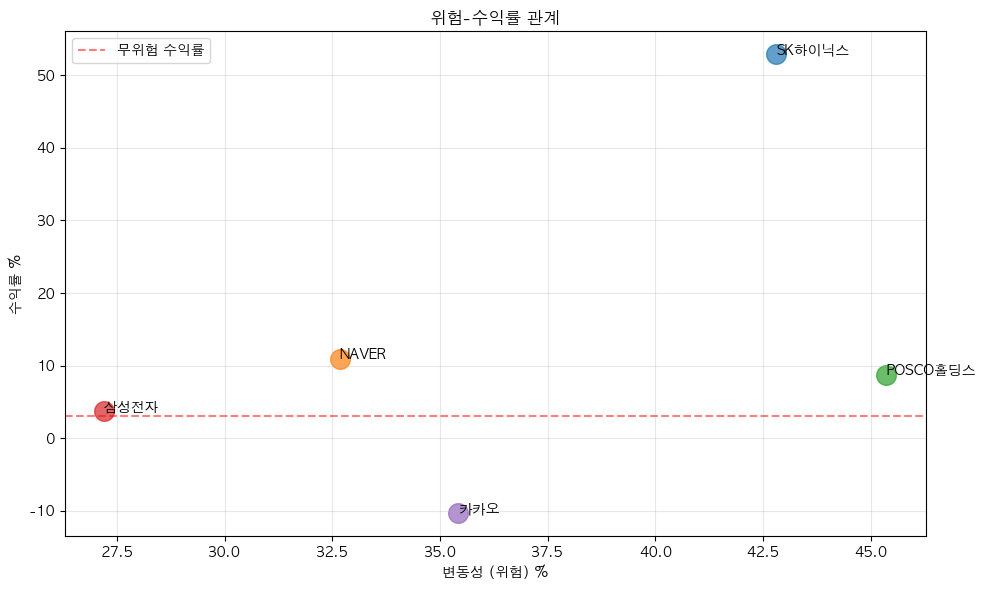

In [22]:
# 각 종목의 연간 수익률과 변동성
annual_returns = returns.mean() * 252 * 100  # 연율화 수익률
annual_volatility = returns.std() * np.sqrt(252) * 100  # 연율화 변동성

# 위험 대비 수익률 (무위험 이자율 = 3% 가정)
risk_free_rate = 3
sharpe_ratio = (annual_returns - risk_free_rate) / annual_volatility

# 결과 정리
performance = pd.DataFrame({
    '연간수익률': annual_returns,
    '연간변동성': annual_volatility,
    '샤프비율': sharpe_ratio
})

performance = performance.sort_values('샤프비율', ascending=False)

print("종목별 성과 지표:")
print("=" * 50)
print(performance.round(2))

# 산점도
plt.figure(figsize=(10, 6))
for name in performance.index:
    plt.scatter(performance.loc[name, '연간변동성'], 
               performance.loc[name, '연간수익률'],
               s=200, alpha=0.7)
    plt.annotate(name, 
                (performance.loc[name, '연간변동성'], 
                 performance.loc[name, '연간수익률']),
                fontsize=10)

plt.xlabel('변동성 (위험) %')
plt.ylabel('수익률 %')
plt.title('위험-수익률 관계')
plt.axhline(y=risk_free_rate, color='red', linestyle='--', alpha=0.5, label='무위험 수익률')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## 14. RSI (상대강도지수) 계산하기

### RSI란?(Relative Strength Index)
- 주가가 과매수/과매도 상태인지 판단하는 지표
- 0~100 사이의 값
- 70 이상: 과매수 (너무 많이 올랐다)
- 30 이하: 과매도 (너무 많이 떨어졌다)

- Delta = 오늘 종가 - 어제 종가
  - 바로 전 시점 대비 가격 변화량

- n = delta 개수
  - 일반적으로 14일을 사용

- Gain = max(delta, 0)

- Loss = max(-delta, 0)

- $\displaystyle RS = \frac{AvgGain}{AvgLoss}$
  - 상대강도
  - Loss 평균 대비 Gain 평균

- $\displaystyle RSI = 100 - \frac{100}{1+RS}$
  - AvgLoss 가 0일때, 계산하지 않고 RS 는 $\infty$ 

- Wilder 방식 갱신

  - $ \displaystyle AvgGain_t = \frac{AvgGain_{t-1}\cdot(n-1)+Gain_t}{n} $

  - $ \displaystyle AvgLoss_t = \frac{AvgLoss_{t-1}\cdot(n-1)+Loss_t}{n} $

- 예 :

date = [ 1일, 2일, 3일, 4일, 5일, 6일, 7일]

value = [100, 102, 101, 104, 107, 105, 106]

delta = [2, -1, 3, 3, -2, 1] : 2일 ~ 7일

gain = [2, 0, 3, 3, 0, 1] : 2일 ~ 7일

loss = [0, 1, 0, 0, 2, 0] : 2일 ~ 7일

n=3 (2일, 3일, 4일)

AvgGain = $\frac{2+0+3}{3} = \frac{5}{3}$

AvgLoss = $\frac{0+1+0}{3} = \frac{1}{3}$

4일 $\displaystyle RS = \frac{\frac{5}{3}}{\frac{1}{3}} \approx 5$

4일 $ RSI \approx 83.33 $

5일차에 반영(매수, 매도, 보유)

- 기준구간 모두 Gain : RSI 100
  - 하락이 하나도 없는 구간

- 기준구간 Gain 평균이 크면 : 50< RSI < 100

- 기준구간 상승, 하락 평균이 같으면 : RSI 50

- 기준구간 Loss 평균이 크면 : 0 < RSI < 50

- 기준구간 모두 Loss : RSI 0
  - 상승이 하나도 없는 구간

삼성전자 현재 RSI: 50.78
→ 중립 구간 (30~70)


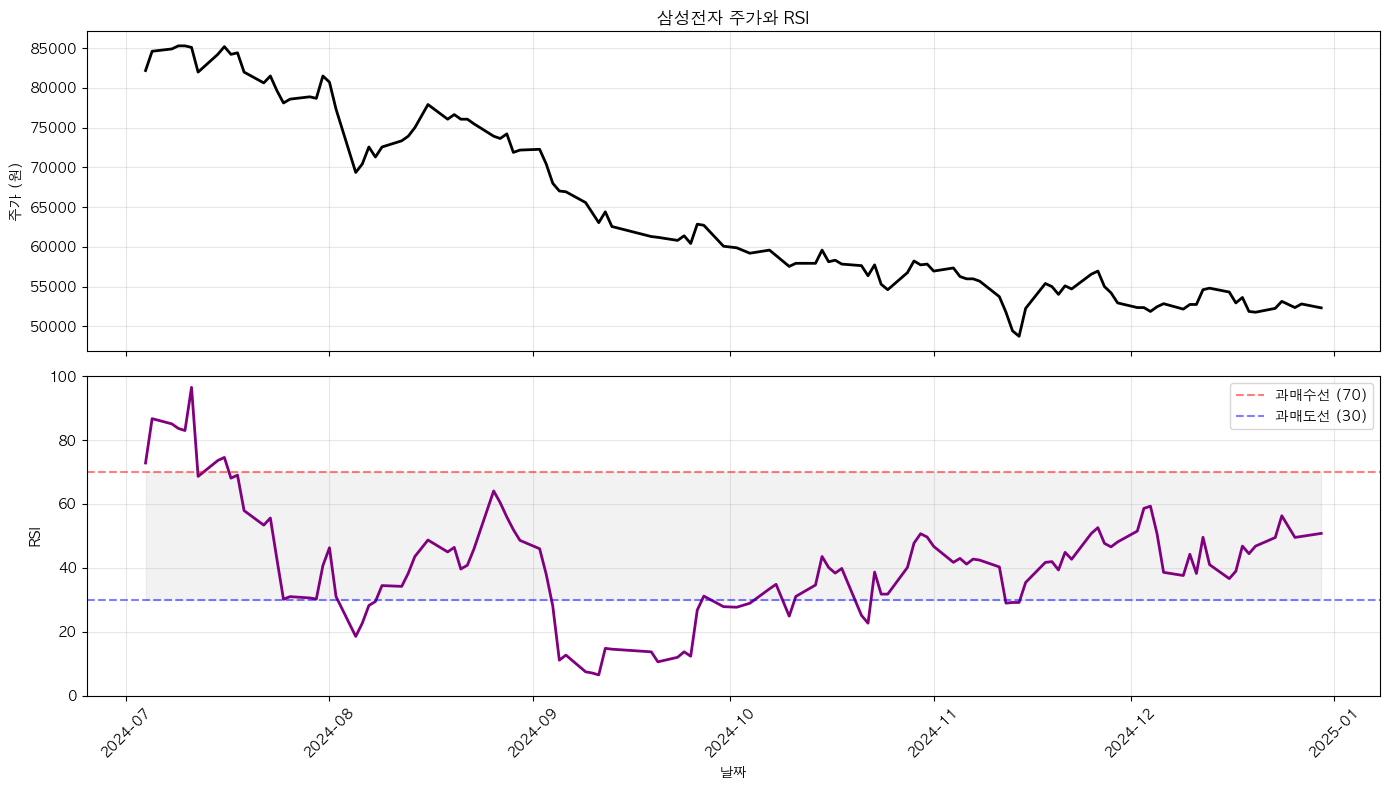

In [23]:
def calculate_rsi(prices, period=14):
    """RSI 계산 함수"""
    delta = prices.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# 삼성전자 RSI 계산
samsung_copy['RSI'] = calculate_rsi(samsung_copy['Close'])

# 최근 RSI 값
recent_rsi = samsung_copy['RSI'].iloc[-1]
print(f"삼성전자 현재 RSI: {recent_rsi:.2f}")

if recent_rsi > 70:
    print("→ 과매수 구간 (70 이상)")
elif recent_rsi < 30:
    print("→ 과매도 구간 (30 이하)")
else:
    print("→ 중립 구간 (30~70)")

# RSI 시각화
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# 주가
ax1.plot(samsung_copy.index[-120:], samsung_copy['Close'].iloc[-120:], color='black', linewidth=2)
ax1.set_ylabel('주가 (원)')
ax1.set_title('삼성전자 주가와 RSI')
ax1.grid(True, alpha=0.3)

# RSI
ax2.plot(samsung_copy.index[-120:], samsung_copy['RSI'].iloc[-120:], color='purple', linewidth=2)
ax2.axhline(y=70, color='red', linestyle='--', alpha=0.5, label='과매수선 (70)')
ax2.axhline(y=30, color='blue', linestyle='--', alpha=0.5, label='과매도선 (30)')
ax2.fill_between(samsung_copy.index[-120:], 30, 70, alpha=0.1, color='gray')
ax2.set_ylabel('RSI')
ax2.set_xlabel('날짜')
ax2.set_ylim(0, 100)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Divergence
  - 가격 움직임과 기술적 지표간의 차이(벌어짐)

  - 상승(bullish) 다이버전스 : 주가가 하락하고 있지만 기술적 지표(RSI)는 상승하는 경우
    - 가격의 하락세가 약해지고, 곧 반등할 가능성을 암시
    - 매도 압력이 약해지고 있으며, 매수세가 강화될 수 있다

  - 하락(bearish) 다이버전스 : 주가가 상승하고 있지만 기술적 지표는 하락하는 경우
    - 가격의 상승세가 약해지고, 곧 하락할 가능성을 암시
    - 매수 압력이 약해지고 있으며, 매도세가 강화될 수 있다

[*********************100%***********************]  1 of 1 completed

상승 다이버전스 개수: 1
하락 다이버전스 개수: 0


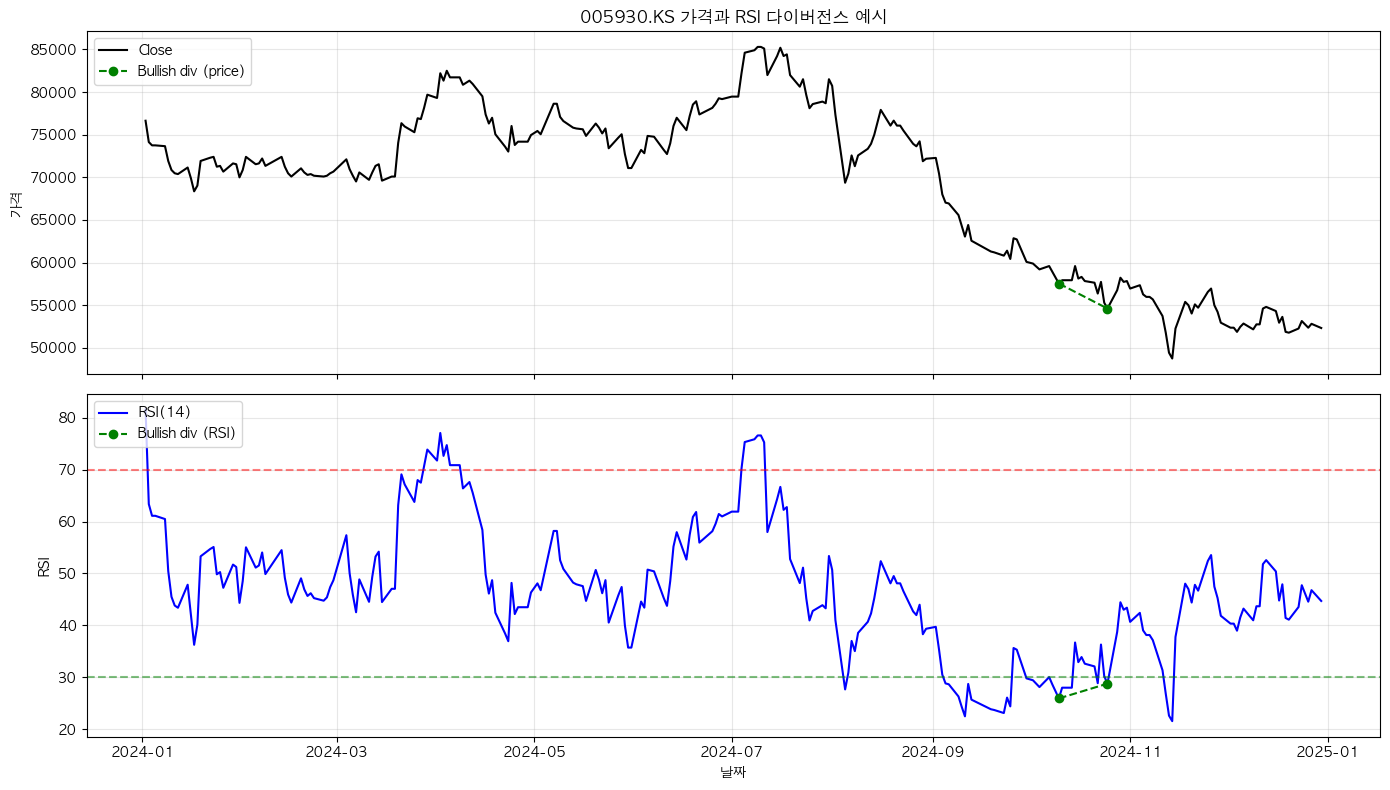

In [24]:
# -------------------------
# 1. RSI 계산 함수 (Wilder 방식)
# -------------------------
def compute_rsi(close: pd.Series, period: int = 14) -> pd.Series:
    delta = close.diff()

    gain = delta.where(delta > 0, 0.0)
    loss = -delta.where(delta < 0, 0.0)

    # Wilder 방식: alpha = 1/period
    avg_gain = gain.ewm(alpha=1/period, min_periods=period, adjust=False).mean()
    avg_loss = loss.ewm(alpha=1/period, min_periods=period, adjust=False).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - 100 / (1 + rs)
    return rsi

# -------------------------
# 2. 로컬 고점/저점(스윙) 찾는 간단 함수
# -------------------------
def find_local_extrema(series: pd.Series, order: int = 2, mode: str = "min"):
    """
    order=2 이면: 앞 2개, 뒤 2개와 비교해서 극값인지 확인
    mode='min' -> 로컬 저점, 'max' -> 로컬 고점
    """
    idx_list = []
    values = series.values
    index = series.index

    for i in range(order, len(series) - order):
        window = values[i - order:i + order + 1]
        center = values[i]

        if mode == "min" and center == window.min():
            idx_list.append(index[i])
        elif mode == "max" and center == window.max():
            idx_list.append(index[i])

    return idx_list

# -------------------------
# 3. 상승(불리시) / 하락(베어리시) 다이버전스 탐지
# -------------------------
def find_bullish_divergences(df, price_col="Close", rsi_col="RSI",
                             rsi_oversold=35, max_lookback=60, order=2):
    """
    상승 다이버전스:
      - 가격: 하락 저점 (두 번째 저점이 더 낮음)
      - RSI: 상승 저점 (두 번째 저점이 더 높음)
      - 두 저점 사이 간격이 너무 멀지 않도록 max_lookback 일 제한
    """
    price = df[price_col]
    rsi = df[rsi_col]

    lows_price = find_local_extrema(price, order=order, mode="min")
    lows_rsi   = find_local_extrema(rsi,   order=order, mode="min")

    # 가격/RSI 모두에서 저점인 지점만 교집합으로 활용 (단순화)
    lows = sorted(set(lows_price).intersection(lows_rsi))

    divergences = []
    for i in range(1, len(lows)):
        t1, t2 = lows[i-1], lows[i]
        # 기간 제한
        if (t2 - t1).days > max_lookback:
            continue

        p1, p2 = price.loc[t1], price.loc[t2]
        r1, r2 = rsi.loc[t1],   rsi.loc[t2]

        # 가격은 더 낮은 저점, RSI는 더 높은 저점, RSI가 어느 정도 과매도영역 근처
        if (p2 < p1) and (r2 > r1) and (r2 < rsi_oversold):
            divergences.append((t1, t2))

    return divergences

def find_bearish_divergences(df, price_col="Close", rsi_col="RSI",
                             rsi_overbought=65, max_lookback=60, order=2):
    """
    하락 다이버전스:
      - 가격: 상승 고점 (두 번째 고점이 더 높음)
      - RSI: 하락 고점 (두 번째 고점이 더 낮음)
    """
    price = df[price_col]
    rsi = df[rsi_col]

    highs_price = find_local_extrema(price, order=order, mode="max")
    highs_rsi   = find_local_extrema(rsi,   order=order, mode="max")

    highs = sorted(set(highs_price).intersection(highs_rsi))

    divergences = []
    for i in range(1, len(highs)):
        t1, t2 = highs[i-1], highs[i]
        if (t2 - t1).days > max_lookback:
            continue

        p1, p2 = price.loc[t1], price.loc[t2]
        r1, r2 = rsi.loc[t1],   rsi.loc[t2]

        # 가격은 더 높은 고점, RSI는 더 낮은 고점, RSI가 어느 정도 과매수 영역 근처
        if (p2 > p1) and (r2 < r1) and (r2 > rsi_overbought):
            divergences.append((t1, t2))

    return divergences

# -------------------------
# 4. 데이터 다운로드 + RSI 계산
# -------------------------
ticker = "005930.KS"  # 삼성전자
start_date = "2023-01-01"
end_date   = "2025-01-01"

df = yf.download(ticker, start=start_date, end=end_date, multi_level_index=False)
df["RSI"] = compute_rsi(df["Close"], period=14)
df = df.dropna(subset=["RSI"])  # 초기 NaN 구간 제거

# 최근 구간만 보고 싶다면 (예: 최근 1년)
df_recent = df.last("365D")  # 필요에 따라 "180D" 등으로 변경 가능

# -------------------------
# 5. 다이버전스 탐지
# -------------------------
bull_divs = find_bullish_divergences(df_recent, price_col="Close", rsi_col="RSI")
bear_divs = find_bearish_divergences(df_recent, price_col="Close", rsi_col="RSI")

print("상승 다이버전스 개수:", len(bull_divs))
print("하락 다이버전스 개수:", len(bear_divs))

# -------------------------
# 6. 차트 그리기 (가격 + RSI + 다이버전스 표시)
# -------------------------
fig, (ax_price, ax_rsi) = plt.subplots(2, 1, sharex=True, figsize=(14, 8))

# 가격 차트
ax_price.plot(df_recent.index, df_recent["Close"], label="Close", color="black")

# RSI 차트
ax_rsi.plot(df_recent.index, df_recent["RSI"], label="RSI(14)", color="blue")
ax_rsi.axhline(70, color="red", linestyle="--", alpha=0.5)
ax_rsi.axhline(30, color="green", linestyle="--", alpha=0.5)

# 상승 다이버전스 표시 (초록색)
for t1, t2 in bull_divs:
    # 가격
    ax_price.plot([t1, t2],
                  [df_recent.loc[t1, "Close"], df_recent.loc[t2, "Close"]],
                  color="green", linestyle="--", marker="o", label="Bullish div (price)" if t1 == bull_divs[0][0] else "")
    # RSI
    ax_rsi.plot([t1, t2],
                [df_recent.loc[t1, "RSI"], df_recent.loc[t2, "RSI"]],
                color="green", linestyle="--", marker="o", label="Bullish div (RSI)" if t1 == bull_divs[0][0] else "")

# 하락 다이버전스 표시 (빨간색)
for t1, t2 in bear_divs:
    ax_price.plot([t1, t2],
                  [df_recent.loc[t1, "Close"], df_recent.loc[t2, "Close"]],
                  color="red", linestyle="--", marker="o", label="Bearish div (price)" if t1 == bear_divs[0][0] else "")
    ax_rsi.plot([t1, t2],
                [df_recent.loc[t1, "RSI"], df_recent.loc[t2, "RSI"]],
                color="red", linestyle="--", marker="o", label="Bearish div (RSI)" if t1 == bear_divs[0][0] else "")

ax_price.set_title(f"{ticker} 가격과 RSI 다이버전스 예시")
ax_price.set_ylabel("가격")
ax_price.legend(loc="upper left")

ax_rsi.set_ylabel("RSI")
ax_rsi.set_xlabel("날짜")
ax_rsi.legend(loc="upper left")
ax_rsi.grid(alpha=0.3)
ax_price.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 15. 실습 마무리 - 배운 내용 정리

### 오늘 배운 것들:
1. **데이터 수집**: yfinance로 주식 데이터 가져오기
2. **OHLCV 이해**: 시가, 고가, 저가, 종가, 거래량의 의미
3. **이동평균선**: 20일, 60일 이동평균 계산과 의미
4. **수익률**: 일간, 기간별 수익률 계산
5. **변동성**: 위험을 나타내는 지표
6. **RSI**: 과매수/과매도 판단 지표

In [25]:
# 최종 데이터프레임 저장
samsung_copy.to_csv('samsung_with_indicators.csv')
close_prices.to_csv('stock_prices.csv')

print("📁 생성된 파일:")
print("  - samsung_with_indicators.csv: 삼성전자 데이터 + 지표")
print("  - stock_prices.csv: 5개 종목 종가 데이터")

📁 생성된 파일:
  - samsung_with_indicators.csv: 삼성전자 데이터 + 지표
  - stock_prices.csv: 5개 종목 종가 데이터
